Joshua Boehm</br>
December 1, 2022</br>
Math 3423</br>
Homework 4</br>

# Libraries/Imports

In [71]:
import numpy as np
import scipy as sp
from numpy.linalg import solve
from numpy.linalg import qr
from numpy.linalg import svd
from scipy.linalg import diagsvd
from scipy.linalg import pinv
from scipy.optimize import minimize
from statistics import mean 
import matplotlib.pyplot as plt

# Question 1

Given the data points
$$(2,1), (5,2), (7,3), (8,3)$$
derive the equation of the least-squares line
$$y = mx + b$$
that best fits the given data points. Solve the system using the QR factorization, the SVD, and the Normal Equations.

In [72]:
A = np.matrix([[2,1],[5,1],[7,1],[8,1]])
b = np.matrix([1,2,3,3]).T

## QR Factorization

The matrix created from the data points:
$$\begin{bmatrix}2, 1 \\ 5, 1 \\7, 1 \\8, 1\end{bmatrix}
\begin{bmatrix}m \\ b\end{bmatrix}=\begin{bmatrix}1 \\2 \\3 \\3\end{bmatrix}$$

To solve using $QR$ factorization, we first factor $A$ as $QR$. <br>
Next, we pre-multiply with $Q^T$, giving $Rx=Q^Tb$ ($Q^TQ$ is the identity matrix)<br>
Now, we can call `solve()` with $R$ and $Q^Tb$

In [73]:
Q, R = qr(A)

x = solve(R, Q.T @ b)
print(x)

[[0.35714286]
 [0.28571429]]


### Solution

$$x = \begin{bmatrix} 0.35714286 \\  0.28571429\end{bmatrix} = \begin{bmatrix}\frac{5}{14} \\ \frac{2}{7}\end{bmatrix}$$

## SVD Factorization

To solve using $SVD$ factorization, we first factor $A$ as $SVD$.    
Now, we create the pseudo-inverse by taking the transpose of the the parts in reverse order, except with $\Sigma$, we take the take the  reciprocals before transposing.    
Last, we can call pre-multiply $b$ with $A^\dagger$, as $A^\dagger A$ is the identity matrix

$$
Ax = b \\
U \Sigma V^T x = b \\
A^\dagger = V \Sigma^\dagger U^T \\
A^TA = I \\
Ix = A^\dagger b \\
x = A^\dagger b \space\space \text{or} \space\space V \Sigma^\dagger U^T b
$$

In [74]:
U, sigma, VT = svd(A)
Sigma = diagsvd(sigma, len(A), len(A.T))
PseudoA = (VT).T @ pinv(Sigma) @ U.T 

x = PseudoA @  b
print(x)

[[0.35714286]
 [0.28571429]]


### Solution

$$x = \begin{bmatrix} 0.35714286 \\  0.28571429\end{bmatrix} = \begin{bmatrix}\frac{5}{14} \\ \frac{2}{7}\end{bmatrix}$$

## Normal Equations

The normal equation is that which minimizes the sum of the square differences between the left and right sides:<br>
$$
A^TAx = A^Tb
$$

In this case, I would just use `solve(A.T @ A, A.T @ b)` and see. You could still utilize the previous factorizations, if desired.

### Solution

In [75]:
solvex = solve(A.T @ A, A.T @ b)
solveqr = solve(R.T @ Q.T @ Q @ R, R.T @ Q.T @ b)
solvesvd = solve(VT.T @ Sigma.T @ U.T @ U @ Sigma @ VT, VT.T @ Sigma.T @ U.T @ b)

print(f"{solvex}\n\n{solveqr}\n\n{solvesvd}")

[[0.35714286]
 [0.28571429]]

[[0.35714286]
 [0.28571429]]

[[0.35714286]
 [0.28571429]]


$$x = \begin{bmatrix} 0.35714286 \\  0.28571429\end{bmatrix} = \begin{bmatrix}\frac{5}{14} \\ \frac{2}{7}\end{bmatrix}$$

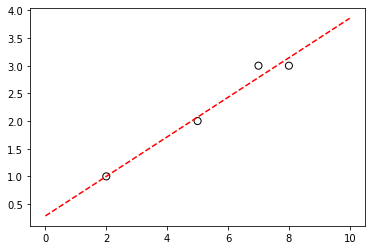

In [76]:
X1 = np.array(A[:,0])
Y1 = np.array(b)
x = np.linspace(0,10,50)
y = (5/14)*x+(2/7)
plt.scatter(X1,Y1, edgecolor='k',c='none',s=50)
plt.plot(x,y, "r--")

# Question 2

Let
$$f(x,y) = 3+x+\frac{1}{2}y-xy+\frac{1}{2}x^2+y^2$$

1. Find the Gradiant and the Hessian of this function.
2. Starting at $\begin{bmatrix}x^0 \\ y^0\end{bmatrix} = \begin{bmatrix}1\\1\end{bmatrix}$ apply _**one-step**_ of Newtown's Method to find $\begin{bmatrix}x^1\\y^1\end{bmatrix}$ and $f(x^1,y^1)$.
3. Use any two methods from `SCIPY.OPTIMIZE` to minimize this function.

### Gradient

In order to derive the gradient, let's first define it:
$$\nabla f = \begin{bmatrix} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y} \\ \vdots\end{bmatrix}$$

First with regards to $x$:

$$\frac{\partial f}{\partial x} \left(3+x+\frac{1}{2}y-xy+\frac{1}{2}x^2+y^2\right) = x-y+1$$

Next with regards to $y$:

$$\frac{\partial f}{\partial y} \left(3+x+\frac{1}{2}y-xy+\frac{1}{2}x^2+y^2\right)  = -x+2y+\frac{1}{2}$$

Thus:

$$\nabla f = \begin{bmatrix} x-y+1 \\ -x+2y+\frac{1}{2}\end{bmatrix}$$

### Hessian

Again, to derive the Hessian, it might help to define it.

$$\bf H_f = 
\begin{bmatrix}
\frac{\partial^2f}{\partial x^2} & \frac{\partial^2f}{\partial x\partial y} \\
\frac{\partial^2f}{\partial y\partial x} & \frac{\partial^2 f}{\partial y^2}
\end{bmatrix}$$

So our second partials are as follows:

\begin{align*}
\frac{\partial^2f}{\partial x^2} &= 1 \\
\frac{\partial^2f}{\partial y\partial x} &= -1 \\
\frac{\partial^2f}{\partial y\partial x} &=  -1\\
\frac{\partial^2 f}{\partial y^2} &= 2
\end{align*}


This makes the Hessian:
$$
\bf {H}_f = \begin{bmatrix} 1 &-1 \\ -1 &2\end{bmatrix}
$$

### Definitions

In [77]:
def q2(x): 
   return 3 + x[0] + (1/2)*x[1] - x[0]*x[1] + (1/2)*x[0]**2 + x[1]**2

def q2_gradient(x):
   return np.array([x[0]-x[1]+1, 
                    -x[0]+2*x[1]+(1/2)])

def q2_hessian(x):
   return np.array([[1,-1], 
                    [-1,2]])
starting_points = [np.random.randint(-20,20, size = (1,2)) for i in range(3)]
section_break = "=========================================================="

Apply one step of Newton's Method:

array([0.79591837, 0.90816327])

## Use any two methods from `SCIPY.OPTIMIZE` to minimize this function.

### Method 1: <span style="color: tan;">Nelder-Mead</span>

In [79]:
for x in enumerate(starting_points):
    result = minimize(q2, x[1], method = 'Nelder-Mead', tol = 1.e-7) 
    
    print(section_break)
    print('Test Run', x[0] + 1, ':')
    print(section_break)

    print('Starting Value Used: ', x[1])
    print("The Minimum Occurs at (x, y) = ", result.x)
    print("The Minimum Value = ", q2(result.x).round(3))
    
    print("Other Statistics:") 
    print(result) 
    print(section_break)
    print(section_break)
    print('\n')

Test Run 1 :
Starting Value Used:  [[-15   4]]
The Minimum Occurs at (x, y) =  [-2.5        -1.50000002]
The Minimum Value =  1.375
Other Statistics:
 final_simplex: (array([[-2.5       , -1.50000002],
       [-2.50000009, -1.50000007],
       [-2.50000003, -1.49999994]]), array([1.375, 1.375, 1.375]))
           fun: 1.3750000000000009
       message: 'Optimization terminated successfully.'
          nfev: 145
           nit: 75
        status: 0
       success: True
             x: array([-2.5       , -1.50000002])


Test Run 2 :
Starting Value Used:  [[-2 12]]
The Minimum Occurs at (x, y) =  [-2.49999995 -1.49999996]
The Minimum Value =  1.375
Other Statistics:
 final_simplex: (array([[-2.49999995, -1.49999996],
       [-2.5       , -1.50000003],
       [-2.50000004, -1.50000002]]), array([1.375, 1.375, 1.375]))
           fun: 1.3750000000000009
       message: 'Optimization terminated successfully.'
          nfev: 121
           nit: 63
        status: 0
       success: True
    

### Method 2: <span style="color: tan;">Powell</span>

In [80]:
for x in enumerate(starting_points):
    result = minimize(q2, x[1], method = 'Powell',tol = 1.e-7) 
    
    print(section_break)
    print('Test Run', x[0] + 1, ':')
    print(section_break)

    print('Starting Value Used: ', x[1])
    print("The Minimum Occurs at (x, y) = ", result.x)
    print("The Minimum Value = ", q2(result.x).round(3))
    
    print("Other Statistics:") 
    print(result) 

    print(section_break)
    print(section_break)
    print('\n')

Test Run 1 :
Starting Value Used:  [[-15   4]]
The Minimum Occurs at (x, y) =  [-2.5 -1.5]
The Minimum Value =  1.375
Other Statistics:
   direc: array([[ 0.   ,  1.   ],
       [-2.75 , -1.375]])
     fun: 1.3749999999999996
 message: 'Optimization terminated successfully.'
    nfev: 89
     nit: 3
  status: 0
 success: True
       x: array([-2.5, -1.5])


Test Run 2 :
Starting Value Used:  [[-2 12]]
The Minimum Occurs at (x, y) =  [-2.5        -1.49999998]
The Minimum Value =  1.375
Other Statistics:
   direc: array([[ 0.   ,  1.   ],
       [-6.75 , -3.375]])
     fun: 1.375
 message: 'Optimization terminated successfully.'
    nfev: 100
     nit: 3
  status: 0
 success: True
       x: array([-2.5       , -1.49999998])


Test Run 3 :
Starting Value Used:  [[  5 -15]]
The Minimum Occurs at (x, y) =  [-2.49999999 -1.50000001]
The Minimum Value =  1.375
Other Statistics:
   direc: array([[0.   , 1.   ],
       [6.75 , 3.375]])
     fun: 1.375
 message: 'Optimization terminated successf

# Question 3

Let
$$f(x,y) = 7 + 5x + 6y + 4xy + 3(x^2+y^2)^2$$

1. Find the Gradiant and the Hessian of this function.
3. Use any two optimization methods from `SCIPY.OPTIMIZE` to minimize this function.

### Gradient

As before, the Gradient definition is:
$$\nabla f = \begin{bmatrix} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y} \\ \vdots\end{bmatrix}$$

First with regards to $x$:

$$\frac{\partial f}{\partial x} \left(7 + 5x + 6y + 4xy + 3(x^2+y^2)^2\right) =12x(x^2+y^2)+4y+5$$

Next with regards to $y$:

$$\frac{\partial f}{\partial y} \left(7 + 5x + 6y + 4xy + 3(x^2+y^2)^2\right)  = 4x+12y(x^2+y^2)+6$$

Thus:

$$\nabla f = \begin{bmatrix}12x(x^2+y^2)+4y+5 \\ 4x+12y(x^2+y^2)+6\end{bmatrix}$$

### Hessian

Again, to derive the Hessian, it might help to define it.

$$\bf H_f = 
\begin{bmatrix}
\frac{\partial^2f}{\partial x^2} & \frac{\partial^2f}{\partial x\partial y} \\
\frac{\partial^2f}{\partial y\partial x} & \frac{\partial^2 f}{\partial y^2}
\end{bmatrix}$$

So our second partials are as follows:

\begin{align*}
\frac{\partial^2f}{\partial x^2} &= 36x^2 + 12y^2 \\
\frac{\partial^2f}{\partial y\partial x} &= 24xy+4 \\
\frac{\partial^2f}{\partial y\partial x} &=  24xy+4\\
\frac{\partial^2 f}{\partial y^2} &= 12x^2+36y^2
\end{align*}


This makes the Hessian:
$$
\bf {H}_f = \begin{bmatrix} 36x^2 + 12y^2 &24xy+4 \\ 24xy+4 &12x^2+36y^2\end{bmatrix}
$$

### Definitions

In [81]:
def q3(x): 
   return 3 + x[0] + (1/2)*x[1] - x[0]*x[1] + (1/2)*x[0]**2 + x[1]**2

def q3_gradient(x):
   return np.array([12*x[0]*(x[0]**2 + x[1]**2) + 4*x[1] + 5, 
                    4*x[0] +12*x[1]*(x[0]**2 + x[1]**2) + 6])

def q3_hessian(x):
   return np.array([[36*x[0]**2 + 12*x[1]**2,24*x[0]*x[1]+4], 
                    [24*x[0]*x[1]+4,12*x[0]**2 + 36*x[1]**2 ]])

section_break = "=========================================================="

### Method 1: <span style="color: tan;">Nelder-Mead</span>

In [82]:
for x in enumerate(starting_points):
    result = minimize(q3, x[1], method = 'Nelder-Mead', tol = 1.e-7) 
    
    print(section_break)
    print('Test Run', x[0] + 1, ':')
    print(section_break)

    print('Starting Value Used: ', x[1])
    print("The Minimum Occurs at (x, y) = ", result.x)
    print("The Minimum Value = ", q3(result.x).round(3))
    
    print("Other Statistics:") 
    print(result) 
    print(section_break)
    print(section_break)
    print('\n')

Test Run 1 :
Starting Value Used:  [[-15   4]]
The Minimum Occurs at (x, y) =  [-2.5        -1.50000002]
The Minimum Value =  1.375
Other Statistics:
 final_simplex: (array([[-2.5       , -1.50000002],
       [-2.50000009, -1.50000007],
       [-2.50000003, -1.49999994]]), array([1.375, 1.375, 1.375]))
           fun: 1.3750000000000009
       message: 'Optimization terminated successfully.'
          nfev: 145
           nit: 75
        status: 0
       success: True
             x: array([-2.5       , -1.50000002])


Test Run 2 :
Starting Value Used:  [[-2 12]]
The Minimum Occurs at (x, y) =  [-2.49999995 -1.49999996]
The Minimum Value =  1.375
Other Statistics:
 final_simplex: (array([[-2.49999995, -1.49999996],
       [-2.5       , -1.50000003],
       [-2.50000004, -1.50000002]]), array([1.375, 1.375, 1.375]))
           fun: 1.3750000000000009
       message: 'Optimization terminated successfully.'
          nfev: 121
           nit: 63
        status: 0
       success: True
    

### Method 2: <span style="color: tan;">Powell</span>

In [83]:
for x in enumerate(starting_points):
    result = minimize(q3, x[1], method = 'Powell',tol = 1.e-7) 
    
    print(section_break)
    print('Test Run', x[0] + 1, ':')
    print(section_break)

    print('Starting Value Used: ', x[1])
    print("The Minimum Occurs at (x, y) = ", result.x)
    print("The Minimum Value = ", q3(result.x).round(3))
    
    print("Other Statistics:") 
    print(result) 

    print(section_break)
    print(section_break)
    print('\n')

Test Run 1 :
Starting Value Used:  [[-15   4]]
The Minimum Occurs at (x, y) =  [-2.5 -1.5]
The Minimum Value =  1.375
Other Statistics:
   direc: array([[ 0.   ,  1.   ],
       [-2.75 , -1.375]])
     fun: 1.3749999999999996
 message: 'Optimization terminated successfully.'
    nfev: 89
     nit: 3
  status: 0
 success: True
       x: array([-2.5, -1.5])


Test Run 2 :
Starting Value Used:  [[-2 12]]
The Minimum Occurs at (x, y) =  [-2.5        -1.49999998]
The Minimum Value =  1.375
Other Statistics:
   direc: array([[ 0.   ,  1.   ],
       [-6.75 , -3.375]])
     fun: 1.375
 message: 'Optimization terminated successfully.'
    nfev: 100
     nit: 3
  status: 0
 success: True
       x: array([-2.5       , -1.49999998])


Test Run 3 :
Starting Value Used:  [[  5 -15]]
The Minimum Occurs at (x, y) =  [-2.49999999 -1.50000001]
The Minimum Value =  1.375
Other Statistics:
   direc: array([[0.   , 1.   ],
       [6.75 , 3.375]])
     fun: 1.375
 message: 'Optimization terminated successf

/var/folders/90/b16ybj8s2gv__lhxf5ttmvj40000gn/T/ipykernel_34318/1248200888.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


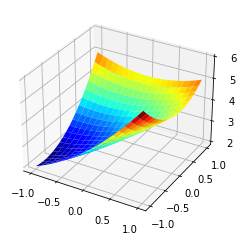

In [84]:
from numpy import linspace, meshgrid
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d') 

x = linspace( -1, 1, 20)
y = linspace( -1, 1, 20)
 
x, y = meshgrid(x,y)
z= 3 + x + (1/2)*y - x*y + (1/2)*x**2 + y**2

surf = ax.plot_surface(x, y, z, 
       rstride=1, cstride=1, cmap=cm.jet, linewidth=0)
plt.show()